# Happiness Report Analysis

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
happy15 = pd.read_csv("happy2015.csv")
happy16 = pd.read_csv('happy2016.csv')
happy17 = pd.read_csv('happy2017.csv')

In [2]:
happy15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
happy15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [7]:
happy16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.0+ KB


In [8]:
happy17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


I have to change the column names in the 2017 data because they are not the same as the other data sets.

In [12]:
happy17 = happy17.rename(columns={"Happiness.Rank": "Happiness Rank", 
                                      "Happiness.Score": "Happiness Score",
                                     "Economy..GDP.per.Capita.": 'Economy (GDP per Capita)',
                                     'Health..Life.Expectancy.': "Health (Life Expectancy)",
                                     "Trust..Government.Corruption.": "Trust (Government Corruption)",
                                     "Dystopia.Residual": "Dystopia Residual"})
happy17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness Rank                   155 non-null int64
Happiness Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy (GDP per Capita)         155 non-null float64
Family                           155 non-null float64
Health (Life Expectancy)         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust (Government Corruption)    155 non-null float64
Dystopia Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


I have to create a column in each data set for the year of the data.

In [38]:
happy15['Year'] = 2015
happy16['Year'] = 2016
happy17['Year'] = 2017

I then have to make a region column for the 2017 data because there is not one.

In [39]:
h = happy15[['Country','Region']]
countries = dict(h.values)
happy17['Region'] = 'Region'
for c in happy17.index:
    if happy17.at[c, 'Country'] in countries:
        happy17.at[c, 'Region'] = countries[happy17.at[c, 'Country']]
    else:
        happy17.at[c, 'Region'] = 'Unknown'
happy17.head()

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year,Region
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017,Western Europe
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017,Western Europe
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017,Western Europe
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017,Western Europe
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017,Western Europe


I combine the datasets into one dataset

In [46]:
frames = [happy15, happy16, happy17]
happy = pd.concat(frames)
happy = happy.set_index(['Country'])
happy = happy.reset_index()
happy

,Country,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Lower Confidence Interval,Region,Standard Error,Trust (Government Corruption),Upper Confidence Interval,Whisker.high,Whisker.low,Year
0,Switzerland,2.517380,1.396510,1.349510,0.665570,0.296780,1,7.587,0.941430,NaN,Western Europe,0.03411,0.419780,NaN,NaN,NaN,2015
1,Iceland,2.702010,1.302320,1.402230,0.628770,0.436300,2,7.561,0.947840,NaN,Western Europe,0.04884,0.141450,NaN,NaN,NaN,2015
2,Denmark,2.492040,1.325480,1.360580,0.649380,0.341390,3,7.527,0.874640,NaN,Western Europe,0.03328,0.483570,NaN,NaN,NaN,2015
3,Norway,2.465310,1.459000,1.330950,0.669730,0.346990,4,7.522,0.885210,NaN,Western Europe,0.03880,0.365030,NaN,NaN,NaN,2015
4,Canada,2.451760,1.326290,1.322610,0.632970,0.458110,5,7.427,0.905630,NaN,North America,0.03553,0.329570,NaN,NaN,NaN,2015
5,Finland,2.619550,1.290250,1.318260,0.641690,0.233510,6,7.406,0.889110,NaN,Western Europe,0.03140,0.413720,NaN,NaN,NaN,2015
6,Netherlands,2.465700,1.329440,1.280170,0.615760,0.476100,7,7.378,0.892840,NaN,Western Europe,0.02799,0.318140,NaN,NaN,NaN,2015
7,Sweden,2.371190,1.331710,1.289070,0.659800,0.362620,8,7.364,0.910870,NaN,Western Europe,0.03157,0.438440,NaN,NaN,NaN,2015
8,New Zealand,2.264250,1.250180,1.319670,0.639380,0.475010,9,7.286,0.908370,NaN,Australia and New Zealand,0.03371,0.429220,NaN,NaN,NaN,2015
9,Australia,2.266460,1.333580,1.309230,0.651240,0.435620,10,7.284,0.931560,NaN,Australia and New Zealand,0.04083,0.356370,NaN,NaN,NaN,2015


In [49]:
happy.to_csv("happy.csv", sep=",")

In [73]:
#dataframe of the happiest country in each year
happiest = happy.loc[happy['Happiness Rank'] == 1]
happiest

,Country,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Lower Confidence Interval,Region,Standard Error,Trust (Government Corruption),Upper Confidence Interval,Whisker.high,Whisker.low,Year
0,Switzerland,2.517380,1.396510,1.349510,0.665570,0.296780,1,7.587,0.941430,NaN,Western Europe,0.03411,0.419780,NaN,NaN,NaN,2015
158,Denmark,2.739390,1.441780,1.163740,0.579410,0.361710,1,7.526,0.795040,7.46,Western Europe,NaN,0.444530,7.592,NaN,NaN,2016
315,Norway,2.277027,1.616463,1.533524,0.635423,0.362012,1,7.537,0.796667,NaN,Western Europe,NaN,0.315964,NaN,7.594445,7.479556,2017


In [74]:
#happiest country in each year with just the categories and the year
happiestclean = happiest[['Year','Dystopia Residual', 'Economy (GDP per Capita)', "Family",
                         'Freedom', 'Generosity', 'Health (Life Expectancy)', 'Trust (Government Corruption)']]
happiestclean.set_index('Year',inplace=True)
happiestclean

,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Health (Life Expectancy),Trust (Government Corruption)
Year,,,,,,,
2015,2.517380,1.396510,1.349510,0.665570,0.296780,0.941430,0.419780
2016,2.739390,1.441780,1.163740,0.579410,0.361710,0.795040,0.444530
2017,2.277027,1.616463,1.533524,0.635423,0.362012,0.796667,0.315964


The following plot shows the happiness score for the happiest country in 2015, 2016, and 2017 and the distribution of the categories that make up the score. It shows that the distopia residual makes up the largest portion of the score, while generosity and trust make up the smallest portions of the score.

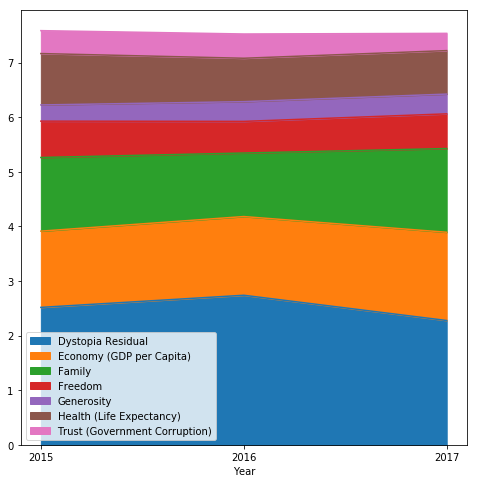

In [107]:
happiestclean.plot.area(xticks = [2015,2016,2017], figsize=(8,8))

The following plot shows the average happiness score in each region in the year 2017. It shows that Western Europe, North America, and Australia and New Zealand have the highest average happiness scores, while Sub-Saharan Africa and Sourhtern Asia have the lowest average happiness scores.

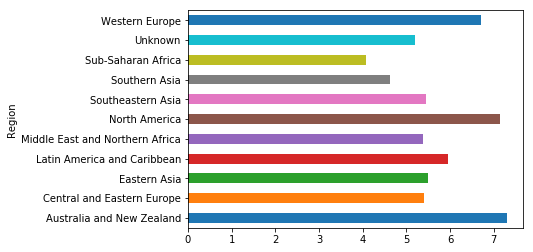

In [186]:
happy2017 = happy.loc[happy['Year']==2017]
happyregion17 = happy2017.groupby('Region')['Happiness Score'].mean()
happyregion17.plot(kind='barh')

The following is a scatter plot showing Economy vs Health with size relating to the rank and color relating to the score. The larger the circle the worse the rank, and the lighter the circle the higher the score. This scatter plot shows a very high correlation between economy and health.

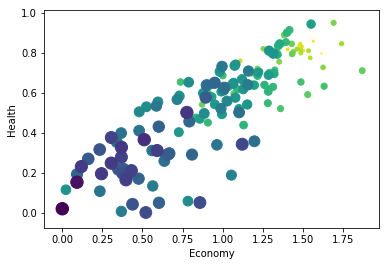

In [135]:
plt.scatter('Economy (GDP per Capita)', 'Health (Life Expectancy)', c='Happiness Score', s = 'Happiness Rank', data = happy2017)
plt.xlabel('Economy')
plt.ylabel('Health')
plt.show()

The following is a scatter plot showing Family vs Freedom with size relating to the rank and color relating to the score. This plot shows there is not as high of a correlation between Freedom and Family compared to Economy and Health.

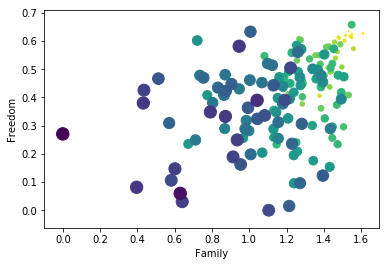

In [138]:
plt.scatter('Family', 'Freedom', c='Happiness Score', s = 'Happiness Rank', data = happy2017)
plt.xlabel('Family')
plt.ylabel('Freedom')
plt.show()

The following area plot shows the top 50 happiest countries in 2017 with their category distributions. There is a somewhat pattern of what is typically the most important in creating the score, but there some variations.

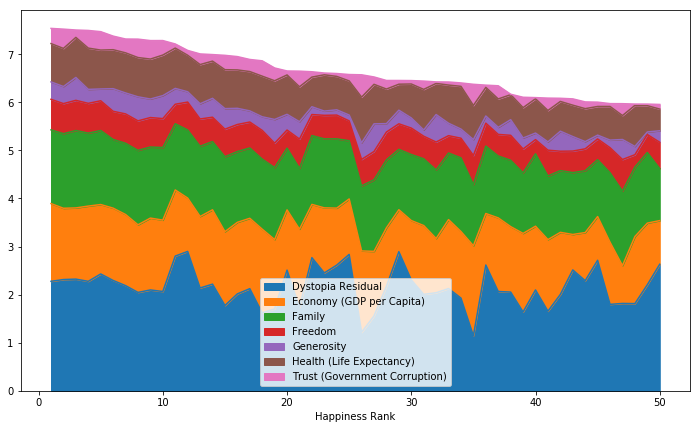

In [145]:
#50 Happiest countries in 2017 and their distribution of categories
happy2017a = happy2017[['Happiness Rank','Dystopia Residual', 'Economy (GDP per Capita)', "Family",
                         'Freedom', 'Generosity', 'Health (Life Expectancy)', 
                        'Trust (Government Corruption)']]
happy2017a.set_index('Happiness Rank', inplace=True)
happy2017a = happy2017a.loc[happy2017a.index < 51]
happy2017a.plot.area(figsize=(12,7))

The following plot shows the correlation between the different categories, total score, and rank. There is a high positive correlation between happiness score and almost every category, and there is a high negative correlation between happiness rank and almost every category, which is to be expected. Some other somewhat high correlations are economy and health, family and economy, and family and health.

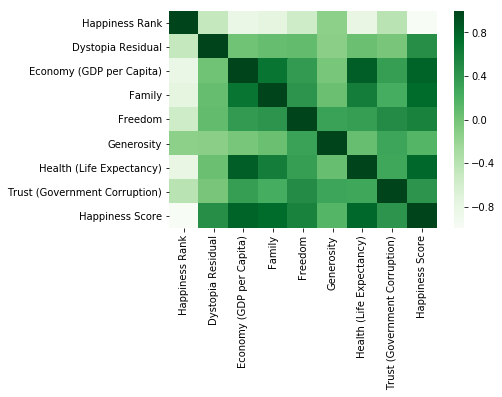

In [182]:
import seaborn as sns
happy2017_trim = happy2017[['Happiness Rank','Dystopia Residual', 'Economy (GDP per Capita)', "Family",
                         'Freedom', 'Generosity', 'Health (Life Expectancy)', 
                        'Trust (Government Corruption)', 'Happiness Score']]
corr = happy2017_trim.corr()
sns.heatmap(corr, cmap = 'Greens')

The following map shows the happiness score for countries on a map. I used code found on kaggle relating to this data set to assist in creating this map. The darker the country, the higher the happiness score. The map makes it easier to see that the happiest countries are in North America, Europe, and Australia/New Zealand, and the least happy countries are found in Africa and Southern Asia.

In [183]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

scl =  [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
data = dict(type = 'choropleth',
            colorscale = scl,
        autocolorscale = False,
           locations = happy2017['Country'],
           locationmode = 'country names',
           z = happy2017['Happiness Score'], 
           text = happy2017['Country'],
           colorbar = {'title':'Happiness Score'})
layout = dict(title = 'Global Happiness in 2017', 
             geo = dict(showframe = False,
                       projection = {'type': 'Mercator'}))
choromap = go.Figure(data = [data], layout=layout)
iplot(choromap)